# Visualizing the Titanic Disaster

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline 

sns.set_style("whitegrid")

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv)

### Step 3. Assign it to a variable titanic 

In [35]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index 

In [36]:
titanic.set_index('PassengerId').head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

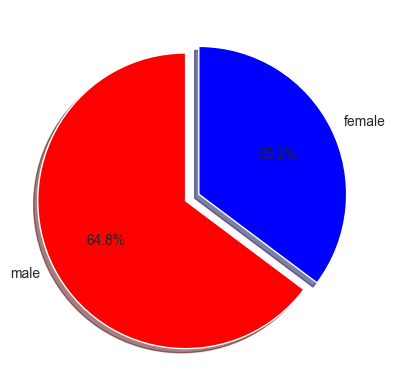

In [37]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True, colors=['red', 'blue'])
plt.ylabel('')

plt.show()

# males = (titanic['Sex'] == 'male').sum()
# females = (titanic['Sex'] == 'female').sum()
# proportions = [males, females]

# plt.pie(proportions, autopct='%1.1f%%', startangle=90, labels=['males', 'females'], explode=(0.1, 0), shadow=True, colors=['red', 'blue'])

# plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

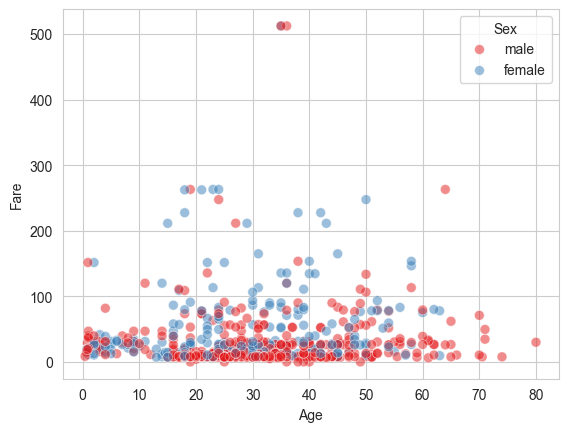

In [38]:
sns.scatterplot(x='Age', y='Fare', data=titanic,hue='Sex', palette='Set1', alpha=0.5, s=50)

plt.show()

*palette参数 'Set1', 'bright', 'husl', 'collwarm'*<br>
*或者自定义*
```python
my_colors = {'male': 'blue', 'female': 'red'}
sns.scatterplot(..., palette=my_colors)
```

### Step 7. How many people survived?

In [39]:
titanic['Survived'].sum()

342

### Step 8. Create a histogram with the Fare payed

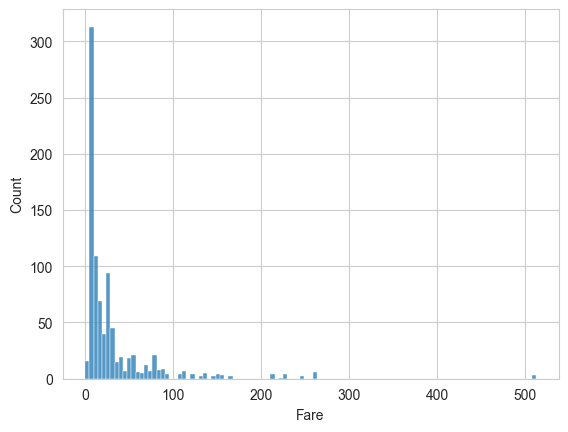

In [40]:
sns.histplot(titanic['Fare'])
plt.show()

### BONUS: Create your own question and answer it.

### Save the cuties, doom the dudes?
*Ladies and Tiny Humans: ez*

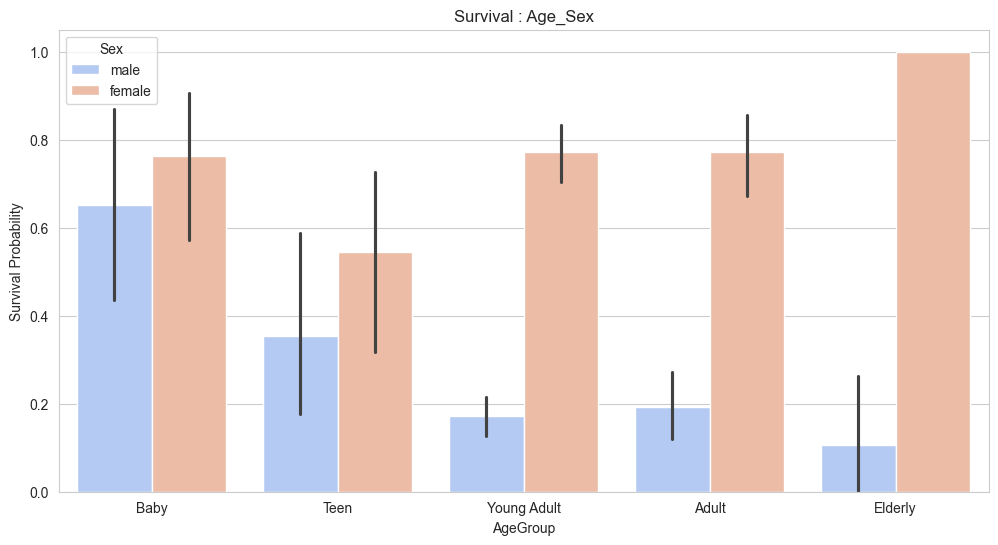

In [47]:
bins = [0, 5, 15, 35, 60, 100]
labels = ['Baby', 'Teen', 'Young Adult', 'Adult', 'Elderly']
titanic['AgeGroup'] = pd.cut(titanic['Age'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
plt.title("Survival : Age_Sex")
plt.ylabel("Survival Probability")

sns.barplot(x='AgeGroup', y='Survived', hue='Sex', data=titanic, palette='coolwarm')

plt.show()

In [93]:
titanic[(titanic['Age'] > 60) & (titanic['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup_Fine,AgeGroup,Age_old,Female
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Elderly,Elderly,1,0
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S,Elderly,Elderly,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN,Elderly,Elderly,1,0


**通过分析年龄和性别对存活率的影响，不难看出女性和年龄较低者最容易存活。**

>- **整体趋势**：女性存活率显著高于男性，验证了女士优先。
>- **年龄特例**：男性儿童与女性儿童存活率均较高，验证了儿童优先。
>- **数据异常**：60岁以上女性显示出 100% 的存活率，为该组别样本量过小导致的统计巧合，而非普遍规律

<h1><div align='center'>Seaborn</div></h1>

## Setup
```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid") 

#plt.figure(figsize=(10, 6)) 
```

---

## 1. 散点图 (Scatterplot)
> **用途**：观察两个数值变量之间的关系。

```python
sns.scatterplot(
    data=df, 
    x='Age',          #X轴
    y='Fare',         #Y轴
    hue='Sex',        #[核心] 按类别自动上色
    size='Pclass',    #[可选] 按数值/类别改变点的大小
    style='Sex',      #[可选] 按类别改变点的形状
    palette='Set1',   #调色板
    alpha=0.6         #透明度防止重叠
)
```

## 2. 柱状图 (Barplot)
> **用途**：对比不同类别的数值大小(默认显示平均值)。

```python
sns.barplot(
    data=df,
    x='Pclass',       #类别列
    y='Fare',         #数值列
    hue='Sex',        #分组对比
    estimator=sum,    #[可选] 默认是平均值，可改为 sum, max 等
    errorbar=None,    #[可选] 去掉那根黑色的误差线
    palette='viridis' #颜色
)
```

## 3. 箱线图 (Boxplot)
> **用途**：看数据的分布范围、中位数和**异常值**。

```python
sns.boxplot(
    data=df,
    x='Pclass',       #分组列
    y='Age',          #数值列
    hue='Sex',        #二次分组
    order=['1st',
           '2nd',     #[可选] 指定 X 轴的排列顺序
           '3rd'], 
    showfliers=False, #[可选] 是否隐藏异常值
    width=0.5         #箱子的宽度
)
```

## 4. 直方图 (Histplot)
> **用途**：看单变量的分布情况。

```python
sns.histplot(
    data=df,
    x='Age', 
    bins=30,          #[核心] 把数据切成多少个桶
    kde=True,         #[核心] 是否显示平滑的密度曲线
    hue='Sex',        #不同类别叠在一起看
    multiple='stack', #[可选] 堆叠模式 'stack', 'dodge', 'layer'
    color='green'     #指定单一颜色
)
```

## 5. 热力图 (Heatmap)
> **用途**：看相关性矩阵。

```python
corr = df.corr(numeric_only=True)

sns.heatmap(
    data=corr,
    annot=True,       #[核心] 在格子里显示具体数字
    fmt='.2f',        #[核心] 数字保留两位小数
    cmap='coolwarm',  #[核心] 颜色方案
    linewidths=0.5,   #格子之间的分割线宽度
    square=True       #强制格子为正方形
)
```

---

## 颜色与样式配置

### 常用`palette`参数
适用于 `barplot`, `boxplot`, `scatterplot` 等**离散分类**图表。

| 名字 | 特点 | 代码示例 |
| :--- | :--- | :--- |
| **Set1 / Set2** | **高对比**，鲜艳，适合分类少时 | `palette='Set1'` |
| **viridis** | **渐变色**，黄绿紫，专业感强 | `palette='viridis'` |
| **pastel** | **马卡龙色**，柔和，适合浅色背景 | `palette='pastel'` |
| **Deep** | **默认**，深沉，稳重 | `palette='deep'` |

### 常用颜色映射
适用于 `heatmap` 等**连续数值**图表。

| 名字 | 特点 | 场景 |
| :--- | :--- | :--- |
| **coolwarm** / **RdBu** | 红-蓝 | 表现正负相关性 (红正蓝负) |
| **Greens** / **Blues** | 单色渐变 | 表现数值密度 (深色数值大) |

---

## Matplotlib 辅助
*Seaborn 画完后，用 `plt` 进行微调。*

```python
plt.title("这是标题", fontsize=16)       # 设置标题
plt.xlabel("X轴标签", fontsize=12)       # 设置X轴文字
plt.ylabel("Y轴标签", fontsize=12)       # 设置Y轴文字

plt.xticks(rotation=45)                 # X轴文字旋转45度防重叠
plt.ylim(0, 100)                        # 强制设置Y轴范围
plt.legend(loc='upper right')           # 调整图例位置

plt.show()                              # 展示
```

<h1><div align='center'>Pandas逻辑运算与优先级</div></h1>

## 1. 多条件筛选
> **注意**：Python 中`&`优先级高于`==`。

* **错误**：`df['Age'] > 60 & df['Sex'] == 'female'` (Python 会先算 `60 & df['Sex']`，直接报错)
* **正确**：`(df['Age'] > 60) & (df['Sex'] == 'female')`

## 2. 运算符选择
> **注意**：Python 的 `and`/`or`/`not` 只能判断单个 True/False，无法处理 Series。

| 逻辑 | Pandas | Python |
| :--- | :---: | :---: |
| **且 (AND)** | **`&`** | `and` |
| **或 (OR)** | **`\|`** | `or` |
| **非 (NOT)** | **`~`** | `not` |

## 3. 取反操作
> **注意**：`~` 的优先级极高，不加括号会先把数字取反。

* **错误**：`~df['Age'] > 60`
* **正确**：`~(df['Age'] > 60)`

## 4. 数据修改
> **注意**：链式索引会修改在临时副本上，原数据不变。

* **错误**：`df[df['Age'] > 60]['Fare'] = 0` (改了个寂寞)
* **正确**：`df.loc[df['Age'] > 60, 'Fare'] = 0`

## 5. 运算对齐机制
> **注意**：Series 之间的加减乘除是**按索引对齐**，而不是按位置。

```python
s1 = pd.Series([1], index=[0])
s2 = pd.Series([2], index=[1])
# s1 + s2 结果全是 NaN，因为索引 0 和 1 对不上
```
*若只想按顺序相加，忽略索引，使用 `.reset_index(drop=True)` 或 `.values`*